In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
from kmodes.kmodes import KModes
sb.set()

In [2]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [4]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [5]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [6]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


In [7]:
heartdata['MAP'] = ((2 * heartdata['ap_lo'] + heartdata['ap_hi'])/3)
MAP = pd.DataFrame(heartdata['MAP'])
MAP.head()

,MAP
0,90.000000
1,106.666667
2,90.000000
3,116.666667
4,73.333333


In [8]:
nhd = heartdata.drop(columns = ['id', 'age'])

# Newheartdata with BMI and MAP and without ID and Age

In [9]:
nhd.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333


In [10]:
nhd.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,107.359371
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,136.493690
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,-41.666667
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,93.333333
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,103.333333
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,7400.000000


In [11]:
quantiles = pd.qcut(nhd['years'], 4, labels=False)
nhd = nhd.assign(years_Q=quantiles.values)

In [12]:
nhd.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP,years_Q
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667,2
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667,0
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333,0


In [13]:
quantiles_bmi = pd.qcut(nhd['bmi'], 4, labels=False)
nhd = nhd.assign(bmi_Q=quantiles_bmi.values)

In [14]:
nhd.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP,years_Q,bmi_Q
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000,1,0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667,2,3
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000,1,0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667,0,2
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333,0,0


In [15]:
quantiles_map = pd.qcut(nhd['MAP'], 4, labels=False, duplicates='drop')
nhd = nhd.assign(map_Q= quantiles_map.values)

# Grouped the non-categorical variables into quantiles making it a categorical variable

This is to facilitate our KModes clustering

In [16]:
nhd.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP,years_Q,bmi_Q,map_Q
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000,1,0,0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667,2,3,2
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000,1,0,0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667,0,2,2
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333,0,0,0


Transformed newheartdata into categorical data

In [17]:
nhd= nhd[["gender","years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]
nhd.head()

,gender,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,2,1,0,0,1,1,0,1,0
1,1,2,3,2,3,1,0,1,1
2,1,1,0,0,3,1,0,0,1
3,2,0,2,2,1,1,0,1,1
4,1,0,0,0,1,1,0,0,0


In [18]:
nhd_male = nhd.query("gender == 2")
nhd_female = nhd.query("gender == 1")
nhd_female.head()

,gender,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
1,1,2,3,2,3,1,0,1,1
2,1,1,0,0,3,1,0,0,1
4,1,0,0,0,1,1,0,0,0
5,1,3,2,0,2,2,0,0,0
6,1,3,3,1,3,1,0,1,0


In [19]:
nhd_male.head()

,gender,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,2,1,0,0,1,1,0,1,0
3,2,0,2,2,1,1,0,1,1
7,2,3,2,1,3,3,0,1,1
11,2,1,0,0,1,1,0,1,0
12,2,0,0,0,1,1,0,0,0


# Made a new dataframe as male and female newheartdata, removing the gender column

# Female Data

In [22]:
nhd_female_km = nhd_female[["years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]

In [23]:
nhd_female_km.head()

,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
1,2,3,2,3,1,0,1,1
2,1,0,0,3,1,0,0,1
4,0,0,0,1,1,0,0,0
5,3,2,0,2,2,0,0,0
6,3,3,1,3,1,0,1,0


# Finding the Optimal Number of KModes Cluster for Females

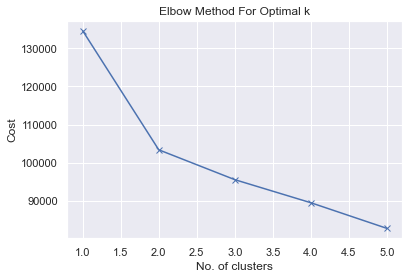

In [24]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(nhd_female_km)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choosing the optimal number of clusters, n = 2

In [25]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_1 = km_huang.fit_predict(nhd_female_km)
clusters_huang_1

array([0, 1, 1, ..., 0, 0, 1], dtype=uint16)

# Explanation for the parameters

n_clusters : The number of clusters to form as well as the number of centroids to generate

init: Method for initialization. In this code, we are using the Method in Huang[1997, 1998]

n_init: Number of time the KModes algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of cost

verbose: Verbosity mode: Showing more 'wordy' information for the task

# Inserting the clusters into the female KModes dataframe

In [26]:
nhd_female_km.insert(0,"Cluster", clusters_huang_1, True)

# female DataFrame with Clusters
nhd_female_km.head()

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
1,0,2,3,2,3,1,0,1,1
2,1,1,0,0,3,1,0,0,1
4,1,0,0,0,1,1,0,0,0
5,1,3,2,0,2,2,0,0,0
6,0,3,3,1,3,1,0,1,0


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Setting what we want to find to be 'Cardio' in the female dataframe

Dropping 'Cardio' from the dataframe so that it does not interfere with our results

In [28]:
target_name = 'cardio'
data_target = nhd_female_km[target_name]
data = nhd_female_km.drop([target_name], axis=1)

# Splitting the dataset into train and test datasets

In [29]:
A_train, A_test, target_train, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)

# Decision Tree using the train and test datasets for female dataset

Accuracy of train dataset

In [30]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(A_train, target_train)

target_train_pred = dectree.predict(A_train)
target_test_pred = dectree.predict(A_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(A_train, target_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(A_test, target_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8709798876721785

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.873636430192547



# Confusion Matrix for female train dataset

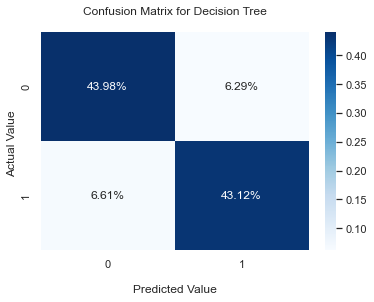

In [31]:
target_train_pred = dectree.predict(A_train)

#Get the confusion matrix 
cf_matrix = confusion_matrix(target_train, target_train_pred)

ax = sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion Matrix for female test dataset

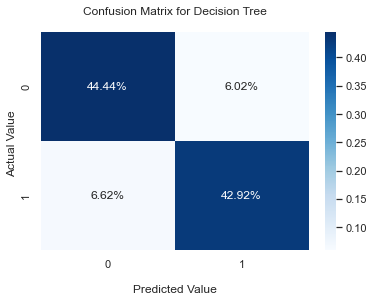

In [32]:
target_test_pred = dectree.predict(A_test)

#Get the confusion matrix 
cf_matrix_test = confusion_matrix(target_test, target_test_pred)

ax = sb.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Male data

In [49]:
nhd_male_km = nhd_male[["years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]

In [48]:
nhd_male_km.head()

,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,1,0,0,1,1,0,1,0
3,0,2,2,1,1,0,1,1
7,3,2,1,3,3,0,1,1
11,1,0,0,1,1,0,1,0
12,0,0,0,1,1,0,0,0


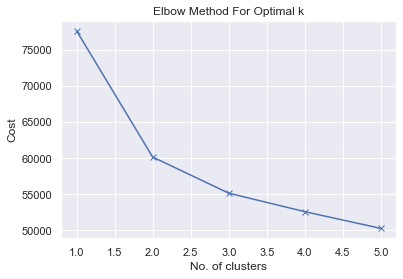

In [50]:
costM = []
KM = range(1,6)
for num_clusters in list(KM):
    kmodeM = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmodeM.fit_predict(nhd_male_km)
    costM.append(kmodeM.cost_)
    
plt.plot(KM, costM, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_2 = km_huang.fit_predict(nhd_male_km)
clusters_huang_2

array([1, 0, 0, ..., 1, 1, 0], dtype=uint16)

In [52]:
nhd_male_km.insert(0, "Cluster", clusters_huang_2, True)

# male DataFrame with Clusters
nhd_male_km.head()

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,1,1,0,0,1,1,0,1,0
3,0,0,2,2,1,1,0,1,1
7,0,3,2,1,3,3,0,1,1
11,1,1,0,0,1,1,0,1,0
12,1,0,0,0,1,1,0,0,0


In [53]:
target_nameM = 'cardio'
data_targetM = nhd_male_km[target_nameM]
dataM = nhd_male_km.drop([target_nameM], axis=1)

In [54]:
trainM, testM, targetM, target_testM = train_test_split(dataM, data_targetM, test_size=0.3, random_state=0)

# Decision Tree using the train and test datasets for male dataset

In [55]:
dectreeM = DecisionTreeClassifier(max_depth = 4)
dectreeM.fit(trainM, targetM)

target_train_predM = dectree.predict(trainM)
target_test_predM = dectree.predict(testM)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeM.score(trainM, targetM))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeM.score(testM, target_testM))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.87383968708039

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8680016346546792



# Confusion Matrix for male train dataset

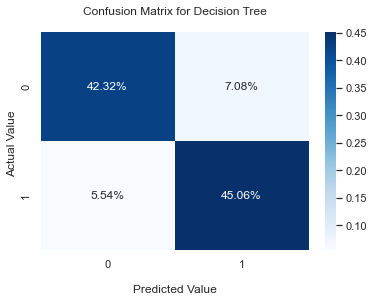

In [56]:
target_train_predM = dectreeM.predict(trainM)

#Get the confusion matrix 
cf_matrixM = confusion_matrix(targetM, target_train_predM)

axM = sb.heatmap(cf_matrixM/np.sum(cf_matrixM), annot=True, fmt='.2%', cmap='Blues')

axM.set_title('Confusion Matrix for Decision Tree\n');
axM.set_xlabel('\nPredicted Value')
axM.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion Matrix for male test dataset

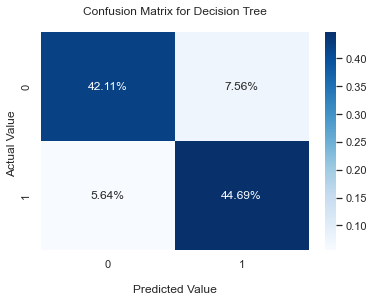

In [57]:
target_test_predM = dectree.predict(testM)

#Get the confusion matrix 
cf_matrix_testM = confusion_matrix(target_testM, target_test_predM)

axTM = sb.heatmap(cf_matrix_testM/np.sum(cf_matrix_testM), annot=True, fmt='.2%', cmap='Blues')

axTM.set_title('Confusion Matrix for Decision Tree\n');
axTM.set_xlabel('\nPredicted Value')
axTM.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()